In [194]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.plotting import plot_decision_regions
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error
import seaborn as sns
sns.set_theme()

In [131]:
# Load breast cancer dataset
cancer = datasets.load_breast_cancer(as_frame=True)
df = cancer.frame

# Consider all 30 features at once
X = df[['mean radius','mean texture']].values
y = df['target'].values
y = np.where(y == 0, 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 39)

In [132]:
# Instantiate our decision tree and fit it
decision_tree = DecisionTreeClassifier(max_depth=4,random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

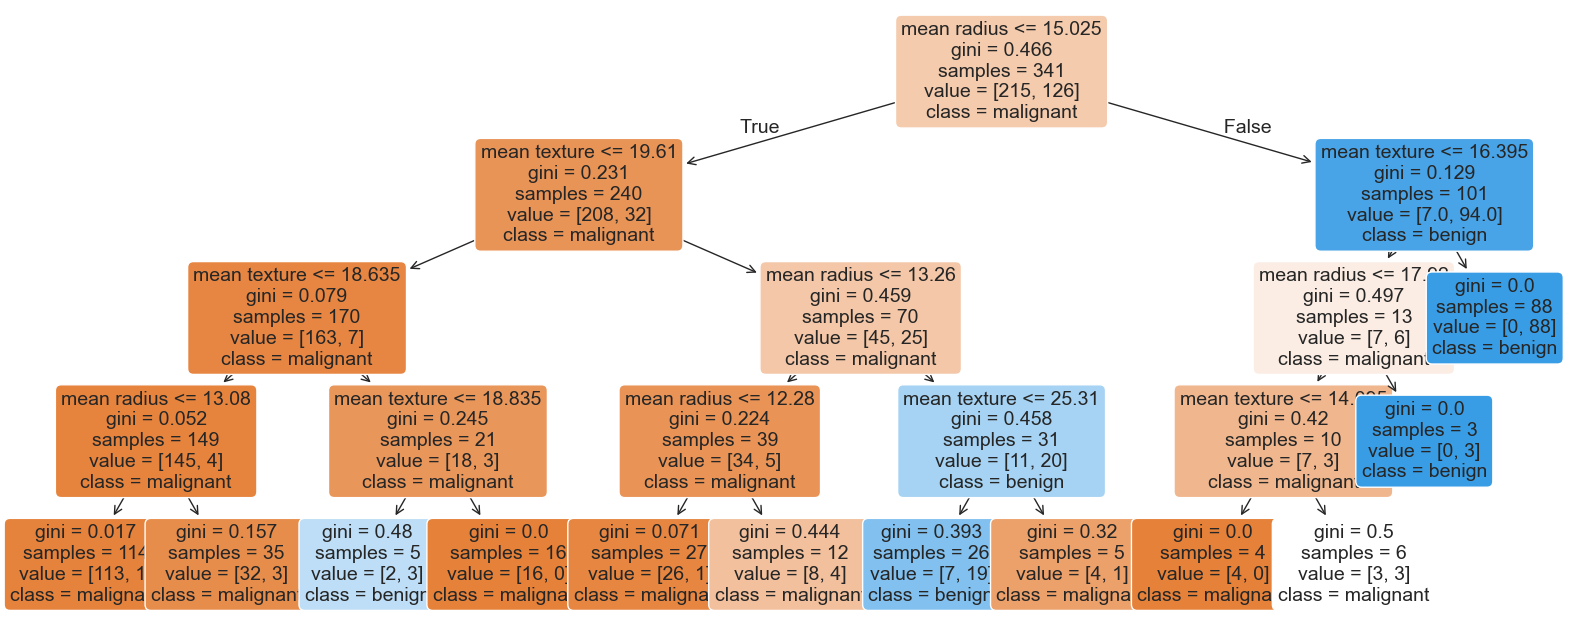

In [135]:
plt.figure(figsize=(20, 8))
a = plot_tree(decision_tree,
                   feature_names = cancer.feature_names,
                   class_names = cancer.target_names,
                   rounded = True,
                   filled = True,
                   fontsize=14)
plt.show()

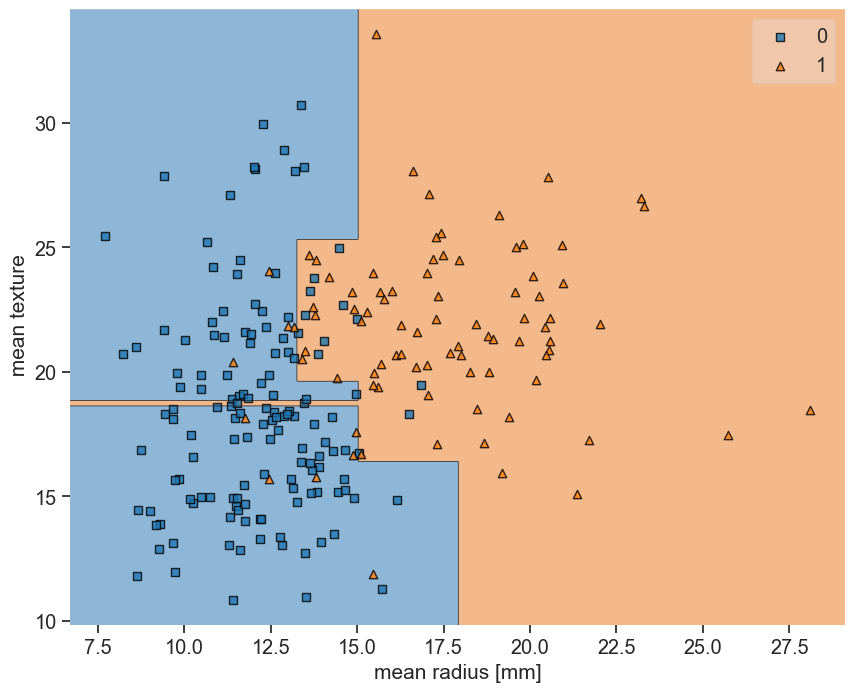

In [133]:
# Plot implied decision region
plt.figure(figsize = (10, 8))
plot_decision_regions(X_test, y_test, clf = decision_tree)
plt.xlabel("mean radius [mm]", fontsize = 15)
plt.ylabel(" mean texture", fontsize = 15)
plt.grid()
plt.show()

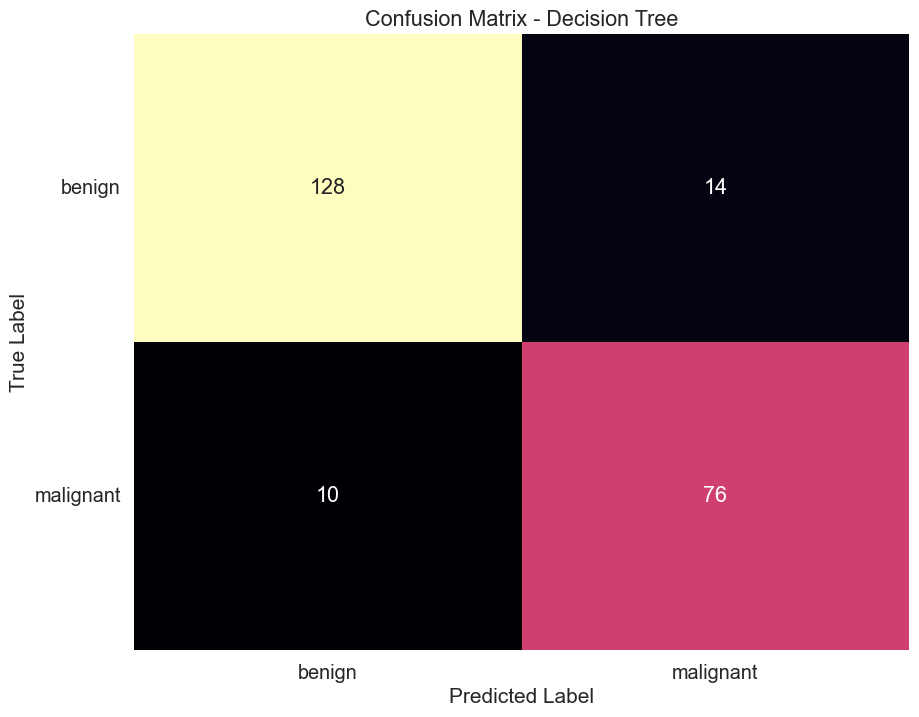

In [136]:
# predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

# Import metrics from sklearn
from sklearn import metrics

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)


plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True,
            fmt = "g",
            ax = ax,
            cmap = "magma",
            cbar = False)

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(["benign", "malignant"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(["benign", "malignant"], rotation=0)
plt.show()

In [137]:
from sklearn.metrics import classification_report

y_pred = decision_tree.predict(X_test)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       142
           1       0.84      0.88      0.86        86

    accuracy                           0.89       228
   macro avg       0.89      0.89      0.89       228
weighted avg       0.90      0.89      0.90       228



Conclusion:
Due to the specific way that the mean radius and mean texture data interacts, it is actually beneficial to use a very small depth for the decision tree to not overfit the data. In fact, in this exact instance, as soon as the model is allowed to go deeper than 4, the decision region begins to have strange extremely narrow bars going through the plane, which is a clear example of overfitting. In this instance, the accuracy of the model is about 90 percent, with its weakest statistic being its precision for malignant tumors, at just 0.84. This means that the model predicts that an instance is malignant more often than it should. This is a product of the way the data interacts in this specific splitting of train and test data.

In [170]:
concrete = datasets.fetch_openml(name='Concrete_Compressive_Strength',version=7, as_frame=True)
df = concrete.frame

X = df.drop(columns='strength').values
y = df['strength'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 39)

In [ ]:
# Get the mena squared error of a regressor with max depth 3:

reg = DecisionTreeRegressor(max_depth=3, random_state = 12)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(f"MSE reg1: {mean_squared_error(y_test, y_pred)} \n")

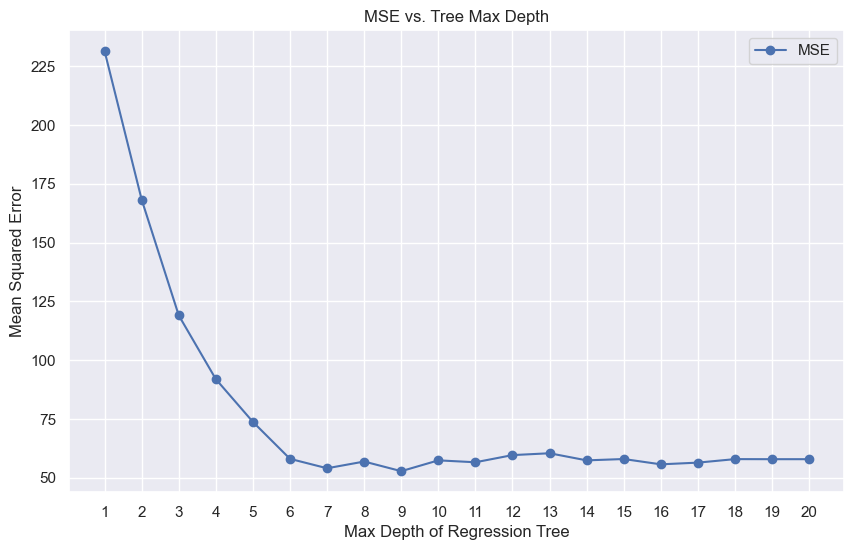

Best Mean Squared Error: 52.761062199201


In [184]:
# Find the best maximum depth
mse_values = []
for i in range(1,21):
    reg = DecisionTreeRegressor(max_depth=i, random_state = 12)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    mse_values.append(mean_squared_error(y_test, y_pred))

x = range(1,21)
plt.figure(figsize=(10, 6))
plt.plot(x, mse_values, marker='o', label="MSE")
plt.title("MSE vs. Tree Max Depth")
plt.xlabel("Max Depth of Regression Tree")
plt.ylabel("Mean Squared Error")
plt.xticks(x)
plt.grid(True)
plt.legend()
plt.show()
print("Best Mean Squared Error: " + str(min(mse_values)))

We see that the best possible mean squared error using a regression tree is just over 50, and is reached once the max depth is at least 9. To get an idea of how good or bad a mean squared error this is, we look back at the target value distribution.

In [193]:
print("Target Mean: " + str(np.mean(y_test)))
print("Target Variance: " + str(np.std(y_test)**2))

Target Mean: 36.188687944733466
Target Variance: 282.7408938863368


We see that the "Normalized MSE" = 52.76/282.74 = 0.1866. This suggests that the predicted strength of thr concrete using the regression tree is a good estimator, as it is more than five times better of an estimator when compared to just guessing 36.18, the mean.